In [ ]:
## INSTALANDO YFINANCE
!pip install yfinance --upgrade
!pip install plotly==5.13.0
!pip install pandas-datareader
!pip install seaborn
!pip install nbformat
!pip install ipython
!pip install openpyxl

In [2]:
                                # LIBS Necessarias 

# Pacotes analise de dados
import pandas as pd
import pandas_datareader.data as web 
import numpy 

#analise de dados#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots

# Fundção para data
from datetime import datetime

# YFiance
import yfinance as yf
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

## API Yahoo Finance
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças .

In [3]:
Dados = web.get_data_yahoo( 'PETR4.SA', period='1y' )

Dados.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [4]:
# Verificar dados da API
Dados.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-09,31.740000,32.689999,31.650000,31.950001,18.671700,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958055,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729471,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285324,55687000
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981436,65689000


In [5]:
# Ultimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-03,24.540001,25.379999,24.420000,24.790001,24.790001,71170700
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300


In [6]:
# Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.959048,30.500000,29.417659,29.972698,23.362926,8.190954e+07
std,3.656831,3.676977,3.617457,3.645209,3.538370,3.684751e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.876520e+07
25%,27.045000,27.565000,26.210000,26.977500,20.005460,5.612075e+07
50%,30.775000,31.384999,30.265000,30.630000,23.231971,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,26.054999,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [7]:
#Informaçoes sobre o uso do codigo
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-09 to 2023-02-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## Media Móvel

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.


E como fazer esse cálculo?
<br>
Basta utilizar a fórmula:
MMA = Soma dos preços de fechamento ÷ Número de dias 

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são: <br> 11,12,13,14,15,16 e 17.
<br>

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13 <br>
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14 <br>
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15

In [8]:
# Media Simples
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [9]:
# Periodo da média móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')


0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


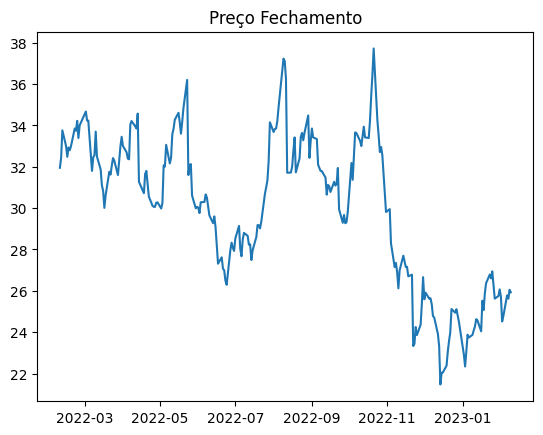

In [10]:
#plot 
plt.plot (Dados ['Close'])
plt.title('Preço Fechamento');

## Função rolling

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados.
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

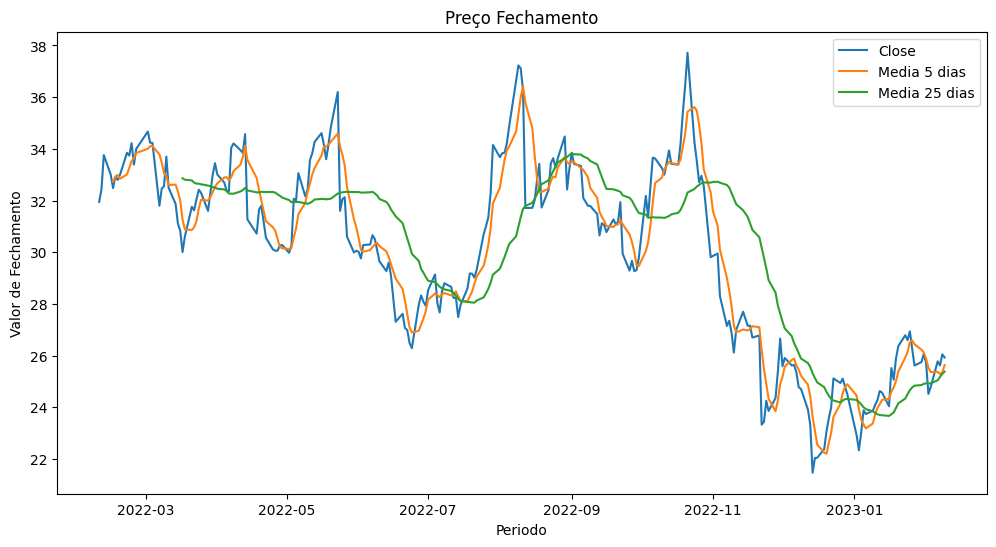

In [11]:
from pandas.core import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados['Close'] )
plt.plot( Dados['Close'].rolling( window=Periodo ).mean() )
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean() )
plt.title('Preço Fechamento')
plt.legend(['Close', 'Media 5 dias', 'Media 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

## Plotly

O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [12]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'
)

Figure.show()   

#### GRAFICOS COM GO - MELHOR CUSTOMIZAÇÃO

In [13]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

#### Candlestick Charts

É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [14]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

In [15]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Luite_emanuel',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

#### Extraindo o Relatorio!

In [ ]:
!pip install -U kaleido


In [17]:
Figura.write_image('Report_Fiananceiro.pdf')